In [ ]:
cd /content/drive/MyDrive/학부연구생

/content/drive/MyDrive/학부연구생


In [ ]:
# !git clone https://github.com/yxuansu/SimCTG.git

Cloning into 'SimCTG'...
remote: Enumerating objects: 2380, done.
remote: Counting objects: 100% (745/745), done.
remote: Compressing objects: 100% (148/148), done.
remote: Total 2380 (delta 711), reused 596 (delta 596), pack-reused 1635
Receiving objects: 100% (2380/2380), 6.79 MiB | 9.49 MiB/s, done.
Resolving deltas: 100% (1486/1486), done.


In [ ]:
# !chmod +x /content/SimCTG/data/download_wikipedia.sh

In [ ]:
# !/content/SimCTG/data/download_wikipedia.sh

Downloading...
From: https://drive.google.com/u/1/uc?export=download&confirm=5_7Y&id=1GSL7FNr_pJAu7T_6VL9HwedTBvi-zZ6N
To: /content/wikipedia.zip
100% 5.41G/5.41G [01:00<00:00, 89.7MB/s]
Archive:  wikipedia.zip
   creating: wikipedia/
  inflating: wikipedia/dev_english_wikipedia.txt  
  inflating: __MACOSX/wikipedia/._dev_english_wikipedia.txt  
  inflating: wikipedia/train_english_wikipedia.txt  


In [ ]:
!pip install torch
!pip install transformers>=4.24.0

In [ ]:
!chmod +x /content/drive/MyDrive/학부연구생/SimCTG/pretraining/train.sh
!/content/drive/MyDrive/학부연구생/SimCTG/pretraining/train.sh

Cuda is available.
Using single GPU training.
Loading dataset...
tokenizer loaded
Loading dev data...
Token indices sequence length is longer than the specified maximum sequence length for this model (235696 > 512). Running this sequence through the model will result in indexing errors
Number of dev batches is 453
Dev data loaded.
Dataset loaded.
Initializing model...
True False
Further pre-train with available parameters.
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.weight', 'cls.seq_relationship.weight', 'bert.pooler.dense.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be e

# 데이터 준비

In [ ]:
import pandas as pd
from google.colab import files

# 코랩 환경에서 파일 업로드
uploaded = files.upload()
for fn in uploaded.keys():
    input_path = fn

# txt 파일을 DataFrame으로 읽어오기
df = pd.read_csv(input_path, delimiter='\t', header=None, names=['ID', 'Origin Stereotype', 'Opposite Stereotype'])

# 엑셀 파일로 저장
output_filename = "output.xlsx"
df.to_excel(output_filename, index=False)
print(f"File saved as {output_filename}")

# 코랩 환경에서 엑셀 파일 다운로드
files.download(output_filename)



Saving opposite_sent_RG_refined.txt to opposite_sent_RG_refined.txt
File saved as output.xlsx


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install datasets
import json
from datasets import load_dataset
import re

bias_frame = load_dataset('social_bias_frames')

  Using cached datasets-2.14.6-py3-none-any.whl (493 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 2.6 MB/s eta 0:00:00
  Using cached multiprocess-0.70.15-py310-none-any.whl (134 kB)


Generating test split:   0%|          | 0/17501 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/16738 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/112900 [00:00<?, ? examples/s]

In [ ]:
# anchor_plus 와 연결하기 위해 작업 데이터셋 로드
import pandas as pd
excel_file_path = '/content/drive/MyDrive/학부연구생/SimCTG_code/prof_test.xlsx'
df_my = pd.read_excel(excel_file_path)

# 리스트에 3컬럼 각각 담기.
anchor_list = []
anchor_minus_list = []
anchor_plus_list = []
ID_list = []

for i in range(112900):
  anchor_minus = bias_frame['train'][i]['targetStereotype']
  if anchor_minus !='':
    anchor = bias_frame['train'][i]['post']
    anchor_plus = df_my[df_my['Origin Stereotype'] == anchor_minus]['Opposite Stereotype']
    # anchor_minus -> anchor -> anchor_plus 를 뽑고, anchor_minus 에서 anchor_plus 를 뽑아서 중복발생.. 크게 문제는 없음!
    if not anchor_plus.empty:
      ID_list.append(i)
      anchor_plus_list.append(anchor_plus.values[0])
      anchor_list.append(anchor)
      anchor_minus_list.append(anchor_minus)

cleaned_anchor_list = []
for anchor_text in anchor_list:
    # RT, @[단어], $#숫자 등의 패턴을 제거
    cleaned_text = re.sub(r'RT\s*@[^: ]*:|@\w+|\$\d+', '', anchor_text)
    # #[단어] 패턴을 제거
    cleaned_text = re.sub(r'#\w+', '', cleaned_text)
    # URL 제거
    cleaned_text = re.sub(r'http\S+', '', cleaned_text)
    # '&'와 ';' 그리고 ':' 제거
    cleaned_text = re.sub(r'[&;:]', '', cleaned_text)
    # 공백 문자 여러 개를 하나로 줄임
    cleaned_text = ' '.join(cleaned_text.split())

    cleaned_anchor_list.append(cleaned_text)

data = {'ID': ID_list,
        'anchor': cleaned_anchor_list,
        'anchor_minus': anchor_minus_list,
        'anchor_plus': anchor_plus_list}

df = pd.DataFrame(data)

df.to_csv('prof_test.csv', index=False)

In [ ]:
import re

cleaned_anchor_list = []
for anchor_text in anchor_list:
    # RT, @[단어], $#숫자 등의 패턴을 제거
    cleaned_text = re.sub(r'RT\s*@[^: ]*:|@\w+|\$\d+', '', anchor_text)
    # #[단어] 패턴을 제거
    cleaned_text = re.sub(r'#\w+', '', cleaned_text)
    # URL 제거
    cleaned_text = re.sub(r'http\S+', '', cleaned_text)
    # '&'와 ';' 그리고 ':' 제거
    cleaned_text = re.sub(r'[&;:]', '', cleaned_text)
    # 공백 문자 여러 개를 하나로 줄임
    cleaned_text = ' '.join(cleaned_text.split())

    cleaned_anchor_list.append(cleaned_text)

# Generation

- GPT 계열 모델을 head 로 해야 함.

In [ ]:
cd /content/drive/MyDrive/학부연구생/SimCTG/

/content/drive/MyDrive/학부연구생/SimCTG


In [ ]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.5/60.5 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 34.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 48.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 79.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 63.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 17.6 MB/s eta 0:00:00
  Created wheel for progressbar: filename=progressbar-2.5-py3-none-any.whl size=12067 sha256=5dfc7714b181535463572b621806a936a14fe475abe510992c93ff303dbe9cef
  Stored in directory: /root/.cache/pip/wheels/cd/17/e5/765d1a3112ff3978f70223502f6047e06c43a24d7c5f8ff95b
Successfully built progressbar


In [ ]:
!pip install simctg --upgrade

  Using cached simctg-0.7.tar.gz (8.5 kB)
  Preparing metadata (setup.py) ... done
  Using cached sacrebleu-1.4.10-py3-none-any.whl (60 kB)
  Using cached progressbar-2.5.tar.gz (10 kB)
  Preparing metadata (setup.py) ... done
  Using cached sklearn-0.0.post9.tar.gz (3.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
cd /content/drive/MyDrive/학부연구생/SimCTG/pretraining

/content/drive/MyDrive/학부연구생/SimCTG/pretraining


In [ ]:
import simctg

In [ ]:
import torch
from simctg_my import SimCTGPretraining
model_path = r'/content/drive/MyDrive/학부연구생/SimCTG_ver4/training_step_50_train_mle_loss_3.431_train_cl_loss_0.512_dev_ppl_199.648'
model = SimCTGPretraining(model_path)
model.eval()



Further pre-train with available parameters.


You are using a model of type gpt2 to instantiate a model of type roberta. This is not supported for all configurations of models and can yield errors.
Some weights of RobertaForMaskedLM were not initialized from the model checkpoint at /content/drive/MyDrive/학부연구생/SimCTG_ver4/training_step_50_train_mle_loss_3.431_train_cl_loss_0.512_dev_ppl_199.648 and are newly initialized: ['encoder.layer.10.intermediate.dense.weight', 'encoder.layer.2.attention.self.value.weight', 'encoder.layer.7.output.dense.weight', 'encoder.layer.9.intermediate.dense.weight', 'encoder.layer.11.attention.self.query.weight', 'encoder.layer.0.attention.output.LayerNorm.weight', 'encoder.layer.8.attention.output.LayerNorm.weight', 'encoder.layer.3.output.LayerNorm.weight', 'encoder.layer.3.intermediate.dense.bias', 'encoder.layer.5.attention.self.query.bias', 'encoder.layer.2.attention.output.dense.bias', 'encoder.layer.6.attention.self.query.weight', 'encoder.layer.7.attention.output.LayerNorm.weight', 'em

SimCTGPretraining(
  (model): RobertaForMaskedLM(
    (roberta): RobertaModel(
      (embeddings): RobertaEmbeddings(
        (word_embeddings): Embedding(50257, 768, padding_idx=1)
        (position_embeddings): Embedding(512, 768, padding_idx=1)
        (token_type_embeddings): Embedding(2, 768)
        (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (encoder): RobertaEncoder(
        (layer): ModuleList(
          (0-11): 12 x RobertaLayer(
            (attention): RobertaAttention(
              (self): RobertaSelfAttention(
                (query): Linear(in_features=768, out_features=768, bias=True)
                (key): Linear(in_features=768, out_features=768, bias=True)
                (value): Linear(in_features=768, out_features=768, bias=True)
                (dropout): Dropout(p=0.1, inplace=False)
              )
              (output): RobertaSelfOutput(
                (dense): Linear(in_

In [ ]:
import torch
from simctg_my import SimCTGPretraining
model_path = r'cambridgeltl/simctg_english_wikipedia'
model_2 = SimCTGPretraining(model_path)
model_2.eval()

Further pre-train with available parameters.


SimCTGPretraining(
  (model): GPT2LMHeadModel(
    (transformer): GPT2Model(
      (wte): Embedding(50257, 768)
      (wpe): Embedding(1024, 768)
      (drop): Dropout(p=0.1, inplace=False)
      (h): ModuleList(
        (0-11): 12 x GPT2Block(
          (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (attn): GPT2Attention(
            (c_attn): Conv1D()
            (c_proj): Conv1D()
            (attn_dropout): Dropout(p=0.1, inplace=False)
            (resid_dropout): Dropout(p=0.1, inplace=False)
          )
          (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (mlp): GPT2MLP(
            (c_fc): Conv1D()
            (c_proj): Conv1D()
            (act): NewGELUActivation()
            (dropout): Dropout(p=0.1, inplace=False)
          )
        )
      )
      (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    )
    (lm_head): Linear(in_features=768, out_features=50257, bias=False)
  )
  (logsftmax): LogSoftmax(dim=

In [ ]:
# Bitches really be mad when you get attention from a guy she likes amp it's even funnier when your not even trying to get his attention ‍♀️
# prepare text prefix
text = r'Black people deserves to be'
# prepare text prefix
tokens = model.tokenizer.tokenize(text)
input_ids = model.tokenizer.convert_tokens_to_ids(tokens)
input_ids = torch.LongTensor(input_ids).view(1,-1)

In [ ]:
# use contrastive search to generate the result
beam_width, alpha, decoding_len = 5, 0.6, 128
eos_token = '<|endoftext|>'
print(model.fast_contrastive_search(input_ids, beam_width, alpha, decoding_len, eos_token))



# Wikitext 다운로드

In [ ]:
cd /content/drive/MyDrive/학부연구생/SimCTG/data

/content/drive/MyDrive/학부연구생/SimCTG/data


In [ ]:
!chmod +x ./download_language_modelling_data.sh
!./download_language_modelling_data.sh

Downloading...
From: https://drive.google.com/u/1/uc?export=download&confirm=opP0&id=1yvGE0x4d6sqiQHsihzIM6MiCC36MV3lO
To: /content/drive/MyDrive/학부연구생/SimCTG/data/language_modelling.zip
100% 189M/189M [00:06<00:00, 27.8MB/s]
Archive:  language_modelling.zip
   creating: language_modelling/
  inflating: language_modelling/.DS_Store  
  inflating: __MACOSX/language_modelling/._.DS_Store  
   creating: language_modelling/wikitext103/
  inflating: language_modelling/wikitext103/wikitext103_raw_v1_test.txt  
  inflating: language_modelling/wikitext103/.DS_Store  
  inflating: language_modelling/wikitext103/wikitext103_raw_v1_validation.txt  
   creating: language_modelling/wikitext103/.ipynb_checkpoints/
  inflating: language_modelling/wikitext103/wikitext103_raw_v1_train.txt  
  inflating: language_modelling/wikitext103/.ipynb_checkpoints/wiki103 dataset-checkpoint.ipynb  
  inflating: language_modelling/wikitext103/.ipynb_checkpoints/Prepare Dataset-checkpoint.ipynb  


In [ ]:
# /content/drive/MyDrive/학부연구생/SimCTG/data/language_modelling/wikitext103/wikitext103_raw_v1_validation.txt

# benchmark

In [ ]:
cd /content/drive/MyDrive/학부연구생

/content/drive/MyDrive/학부연구생


In [ ]:
# !git clone https://github.com/princeton-nlp/MABEL.git

Cloning into 'MABEL'...
remote: Enumerating objects: 213, done.
remote: Counting objects: 100% (213/213), done.
remote: Compressing objects: 100% (155/155), done.
remote: Total 213 (delta 97), reused 157 (delta 56), pack-reused 0
Receiving objects: 100% (213/213), 6.06 MiB | 4.77 MiB/s, done.
Resolving deltas: 100% (97/97), done.


In [ ]:
cd /content/drive/MyDrive/학부연구생/MABEL

/content/drive/MyDrive/학부연구생/MABEL


In [ ]:
!pip install -r requirements.txt

In [ ]:
!pip install tokenizers

In [ ]:
!pip install setuptools

In [ ]:
!pip install transformers

In [ ]:
!python -m benchmark.intrinsic.stereoset.predict --seed 26 \
--model BertForMaskedLM \
--model_name_or_path /content/drive/MyDrive/학부연구생/bert_base_plus_lr14_seed74_st350_wm03/training_step_350_train_mle_loss_1.193_train_cl_loss_0.135_dev_ppl_175.702

Running StereoSet:
 - persistent_dir: /content/drive/MyDrive/학부연구생/MABEL/benchmark/intrinsic
 - model: BertForMaskedLM
 - model_name_or_path: /content/drive/MyDrive/학부연구생/bert_base_plus_lr14_seed74_st350_wm03/training_step_350_train_mle_loss_1.193_train_cl_loss_0.135_dev_ppl_175.702
 - batch_size: 1
 - seed: 26
Evaluating intrasentence task.
2023-11-06 10:49:17.129269: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-06 10:49:17.129325: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-06 10:49:17.129362: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
20

In [ ]:
!python -m benchmark.intrinsic.stereoset.eval

Evaluating StereoSet files:
 - predictions_file: /content/drive/MyDrive/학부연구생/MABEL/benchmark/intrinsic/stereoset/bert_base_plus_lr14_seed74_st350_wm03.json
 - predictions_dir: None
 - output_file: None
intrasentence
	gender
		Count: 2313.0
		LM Score: 80.78109270142005
		SS Score: 58.73306549540932
		ICAT Score: 66.67176123437538


- 훈련 100 step

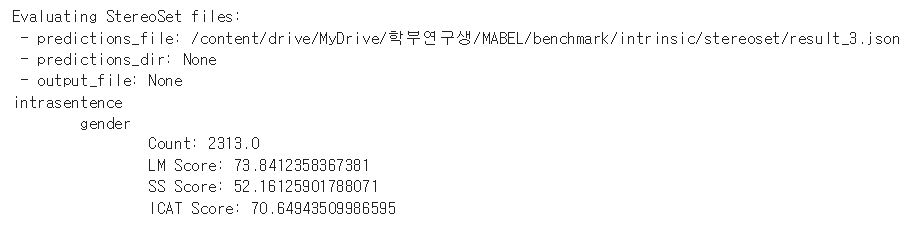

- 훈련 진행 후

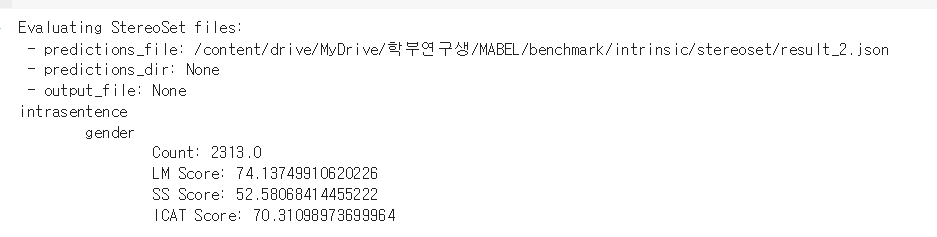

- 참고로 roberta-base 의 경우 88, 66, 59

In [ ]:
!python -m benchmark.intrinsic.crows.eval --model_name_or_path /content/drive/MyDrive/학부연구생/plus_lr45_seed74/training_step_422_train_mle_loss_0.678_train_cl_loss_0.098_dev_ppl_14.996

Running CrowS-Pairs benchmark:
 - model: BertForMaskedLM
 - model_name_or_path: /content/drive/MyDrive/학부연구생/plus_lr45_seed74/training_step_422_train_mle_loss_0.678_train_cl_loss_0.098_dev_ppl_14.996
 - bias_type: gender
Evaluating gender examples.
 94% 245/262 [00:16<00:00, 21.49it/s]Skipping example 245.
100% 261/262 [00:18<00:00, 14.28it/s]
Total examples: 261
Metric score: 59.0
Stereotype score: 66.04
Anti-stereotype score: 48.04
Num. neutral: 0.0

Metric: 59.0


# Hate speech Detection

In [ ]:
!pip install transformers
!pip install datasets
!pip install accelerate
!pip install tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 57.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 58.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 42.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.7/493.7 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.1/258.1 kB 4.6 MB/s eta 0:00:00


In [ ]:
import torch
from torch.utils.data import DataLoader, random_split
from transformers import RobertaTokenizer, RobertaForSequenceClassification, Trainer, TrainingArguments
from datasets import load_dataset, load_metric
from tqdm import tqdm


# 1. 데이터 로드 코드
dataset = load_dataset("hate_speech18")

# 0과 1이 아닌 라벨 데이터를 제외하는 함수
def filter_labels(example):
    return example['label'] in [0, 1]

# 0과 1이 아닌 라벨을 제외하고 데이터를 필터링
dataset = dataset.filter(filter_labels)


# 저장된 모델 및 토크나이저의 경로 지정
#MODEL_PATH = "/content/drive/MyDrive/학부연구생/plus_margin_09/training_step_422_train_mle_loss_0.931_train_cl_loss_0.119_dev_ppl_16.268"
#TOKENIZER_PATH = "/content/drive/MyDrive/학부연구생/plus_margin_09/training_step_422_train_mle_loss_0.931_train_cl_loss_0.119_dev_ppl_16.268"
MODEL_PATH = "roberta-base"
TOKENIZER_PATH = "roberta-base"

tokenizer = RobertaTokenizer.from_pretrained(TOKENIZER_PATH)
model = RobertaForSequenceClassification.from_pretrained(MODEL_PATH, num_labels = 2)

def tokenizer_function(example):
  encoding = tokenizer(example['text'], truncation=True, padding='max_length', max_length=256)
  return {
      "input_ids": encoding['input_ids'],
      "attention_mask": encoding["attention_mask"],
      "label": example["label"]
  }

# 토큰화 수행
train_val_dataset = dataset['train'].map(tokenizer_function, batched=True)

# 2. train, val, test 세트로 분할

train_size = int(0.6 * len(train_val_dataset))
val_size = int(0.15 * len(train_val_dataset))
test_size = len(train_val_dataset) - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(train_val_dataset, [train_size, val_size, test_size])

# 3. 모델 및 토크나이저 로드 코드 (구글 드라이브 주소에서)

# 4. 에폭마다 training loss, epoch, step, validation loss, accuracy 평가
from sklearn.metrics import accuracy_score, f1_score
def compute_metrics(p):
  labels= p.label_ids
  preds = p.predictions.argmax(-1)
  f1 = f1_score(labels, preds, average = 'weighted')
  acc = accuracy_score(preds, labels)
  return {"accuracy": acc, "f1": f1}
    #metric = load_metric("accuracy")
    #return metric.compute(predictions=p.predictions.argmax(-1), references=p.label_ids)


training_args = TrainingArguments(
    output_dir="/content/drive/MyDrive/학부연구생/HSD_result/roberta-ep-3",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    logging_dir="/content/drive/MyDrive/학부연구생/HSD_result/roberta-ep-3",
    logging_steps=10,
    do_train=True,
    do_eval=True,
    no_cuda=False,
    load_best_model_at_end=True
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

# 훈련 시작
trainer.train()

# test 세트에 대한 성능 측정
test_result = trainer.evaluate(test_dataset)

print(f"Test Accuracy: {test_result['eval_accuracy']}")


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.bias', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.383800,0.361085,0.883489,0.828837
2,0.342900,0.382570,0.883489,0.828837
3,0.330200,0.400904,0.883489,0.828837


Test Accuracy: 0.8789689951438177
